# Name-Harsh Agrawal CSE SEM-7 Section-B Shift-2 Rollno-43

# DVA LAB 4 PART-A(LINEAR REGRESSION)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

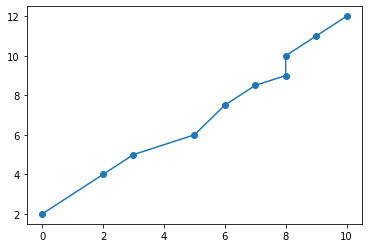

In [2]:
#a. Plot the data

x = [0, 2, 3, 5,  6,  7, 8, 8, 9, 10]
y = [2, 4, 5, 6,7.5,8.5, 9, 10, 11, 12]
plt.plot(x,y,marker='o')
plt.show()

In [3]:
#b. Use LinearRegression model from sklearn library to perform linear regression.

x = np.array([0, 2, 3, 5,  6,  7, 8, 8, 9, 10]).reshape((-1,1))
y = np.array([2, 4, 5, 6,7.5,8.5, 9, 10, 11, 12])
model = LinearRegression() 
model.fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}\n")

print(f"intercept: {model.intercept_}\n")

print(f"slope: {model.coef_}\n")

coefficient of determination: 0.9832917172807847

intercept: 1.8274058577405858

slope: [0.97803347]



In [4]:
#c. Consider a data value for x and predict the value of y using the above model.

y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 1.82740586  3.7834728   4.76150628  6.71757322  7.69560669  8.67364017
  9.65167364  9.65167364 10.62970711 11.60774059]


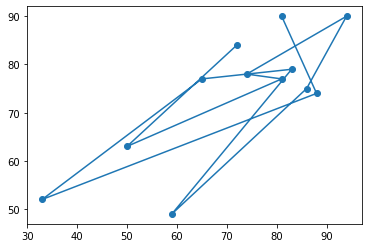

In [5]:
#a. Plot the data. Do x and y seem to have a linear relationship?

x = np.array([72,50,81,74,94,86,59,83,65,33,88,81])
y = np.array([84,63,77,78,90,75,49,79,77,52,74,90])

plt.plot(x,y,marker='o')
plt.show()

In [6]:
#b. Use the method of least squares to find an equation for the prediction of a student’s final exam grade based on the 
#student’s midterm grade in the course.
#Write a function in python to compute the coefficients and equation. [Do not use the inbuild library method.]

X = np.array([72,50,81,74,94,86,59,83,65,33,88,81])
Y = np.array([84,63,77,78,90,75,49,79,77,52,74,90])

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)

# total no.of input values
m = len(X)

# using the formula to calculate m & c
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'slope = {m} \ncoefficient = {c}')


# plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(Y) - 100

# calculating line values x and y
x = np.linspace (min_x, max_x, 100)
y = c + m * x

# calculating R-squared value for measuring goodness of our model. 

ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals

for i in range(len(X)): # val_count represents the no.of input x values
    y_pred = c + m * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print("Root mean square=",r2)

slope = 0.5816000773918933 
coefficient = 32.02786108155169
Root mean square= 0.6127899869050231


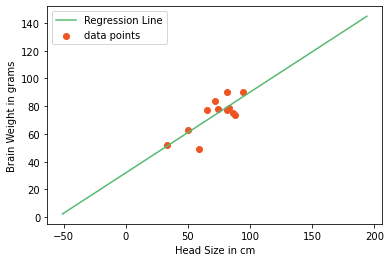

In [7]:
#c. Also show the plot with the datapoints and the obtained linear equation line.

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='data points')

plt.xlabel('Head Size in cm')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [8]:
#d. Predict the final exam grade of student who received an 86 in the midterm exam based on the equation of least squares.

x = np.array([72,50,81,74,94,86,59,83,65,33,88,81]).reshape((-1,1))
y = np.array([84,63,77,78,90,75,49,79,77,52,74,90])

model = LinearRegression() 
model.fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}\n")

print(f"intercept: {model.intercept_}\n")

print(f"slope: {model.coef_}\n")

y_pred = model.predict(np.array([86]).reshape((-1,1)))
print(f"predicted response:\n{y_pred}")

coefficient of determination: 0.6127899869050231

intercept: 32.02786108155171

slope: [0.58160008]

predicted response:
[82.04546774]


# Do as Directed [Multiple Linear regression]:

In [10]:
# 3. Perform Multiple Linear regression on cars.csv dataset.

df = pd.read_csv("cars.csv")
display(df)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


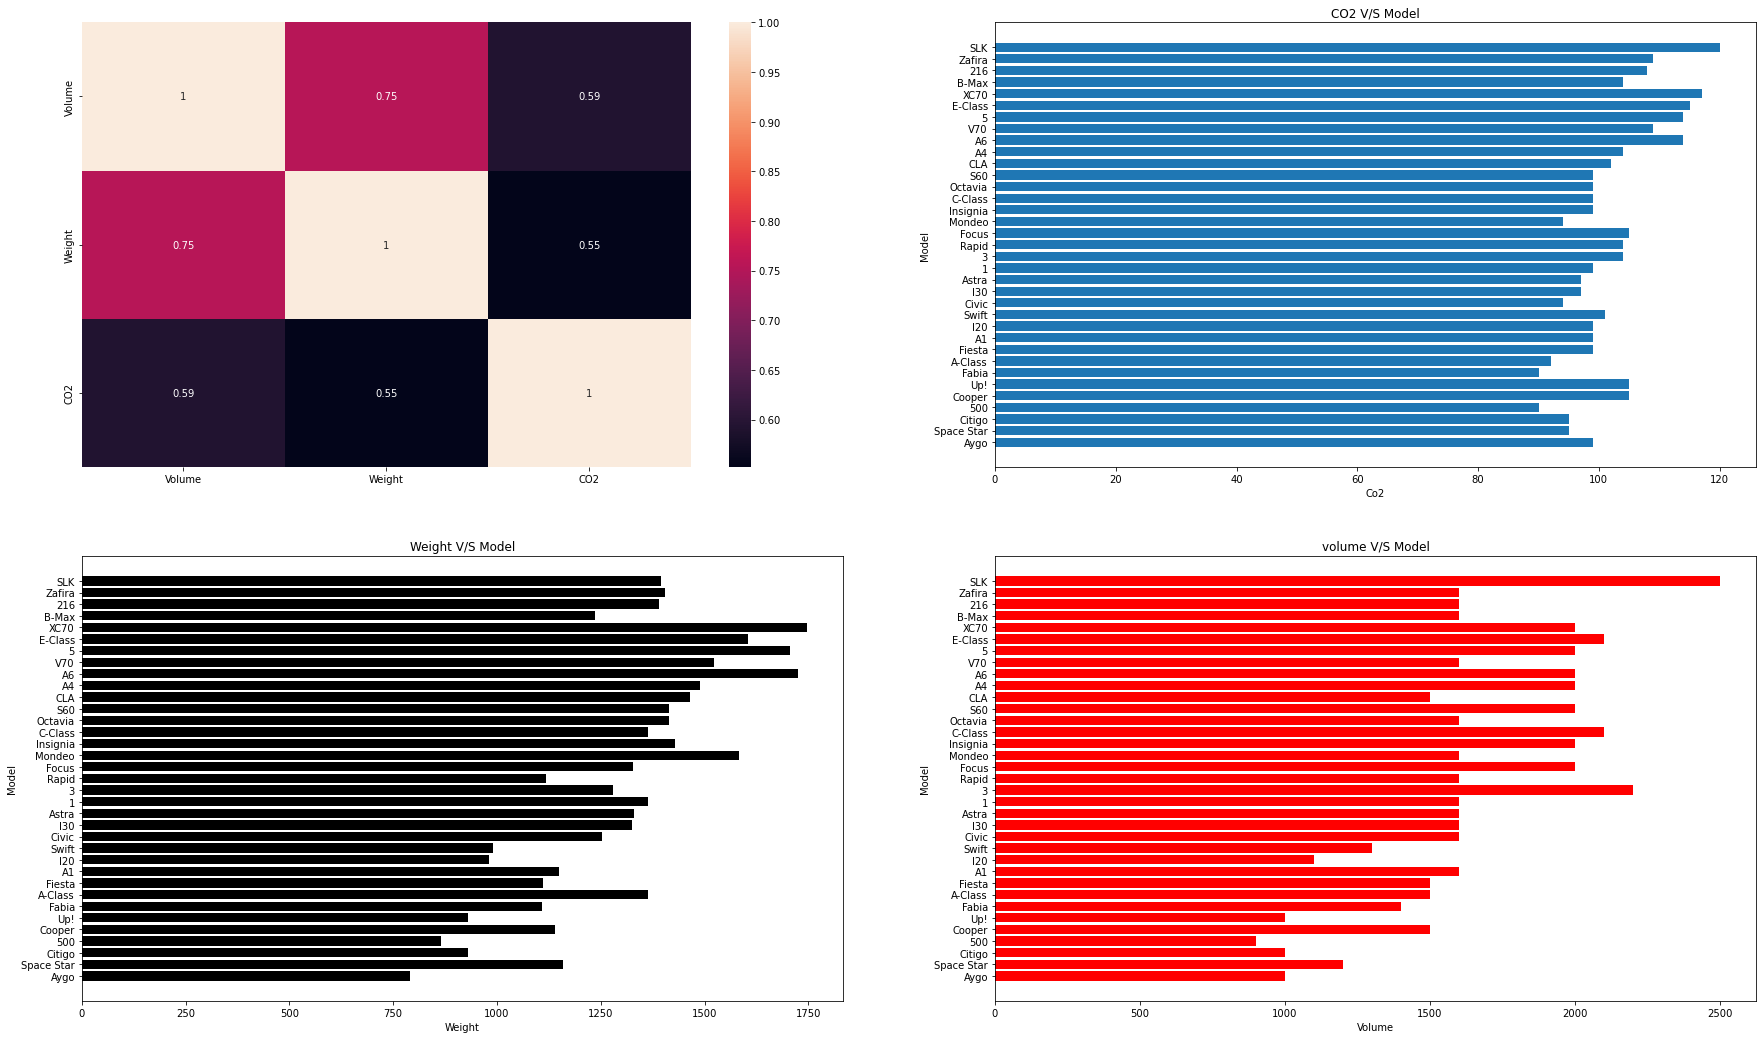

In [13]:
# (a) Analyse each column of the datset using appropriate visualization technique

df = pd.read_csv("cars.csv")
plt.figure(figsize=(30,18))

plt.subplot(221)
c = df.corr()
sns.heatmap(c,annot=True)

plt.subplot(222)
plt.barh(df['Model'].tolist(),df['CO2'].tolist())
plt.xlabel("Co2")
plt.ylabel("Model")
plt.title("CO2 V/S Model")

plt.subplot(223)
plt.barh(df['Model'].tolist(),df['Weight'].tolist(),color='k')
plt.xlabel("Weight")
plt.ylabel("Model")
plt.title("Weight V/S Model")

plt.subplot(224)
plt.barh(df['Model'].tolist(),df['Volume'].tolist(),color='r')
plt.xlabel("Volume")
plt.ylabel("Model")
plt.title("volume V/S Model")

plt.show()

In [20]:
# (b) Consider only weight and volume columns as multiple variables to predict the CO2 emission.

df = pd.read_csv("cars.csv")
x = df[['Volume','Weight']]
y = df['CO2']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, shuffle=True)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
rmse = (np.sqrt(mse))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:

MSE is 35.006566811082386
RMSE is 5.916634753902119
R2 score is 0.34933966998969557


In [21]:
# (c) Predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300ccm. 

print("Predicted CO2 value {}".format(lin_model.predict([[1300,2300]])))

Predicted CO2 value [108.99598022]


C:\Users\agraw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
# (d) Perform prediction on few more values.

print("Predicted CO2 value for volume=1400 and wieght=7300 {}".format(lin_model.predict([[1400,7300]])))
print("Predicted CO2 value for volume=1500 and wieght=6300 {}".format(lin_model.predict([[1500,6300]])))
print("Predicted CO2 value for volume=1600 and wieght=5300 {}".format(lin_model.predict([[1600,5300]])))
print("Predicted CO2 value for volume=1700 and wieght=4300 {}".format(lin_model.predict([[1700,4300]])))
print("Predicted CO2 value for volume=1800 and wieght=3300 {}".format(lin_model.predict([[1800,3300]])))

Predicted CO2 value for volume=1400 and wieght=7300 [152.9605938]
Predicted CO2 value for volume=1500 and wieght=6300 [144.9999905]
Predicted CO2 value for volume=1600 and wieght=5300 [137.0393872]
Predicted CO2 value for volume=1700 and wieght=4300 [129.07878391]
Predicted CO2 value for volume=1800 and wieght=3300 [121.11818061]


C:\Users\agraw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\agraw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\agraw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\agraw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\agraw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
# (e) Show the coefficient obtained and conclude.

r_sq = lin_model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.3726280253786124


In [24]:
# 4. Perform linear regression on the dataset [use dataset: kc_house_data.csv]

df = pd.read_csv("kc_house_data.csv")
print("Columns present are:")
for i in df.columns:
    print(i)
display(df)

Columns present are:
id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


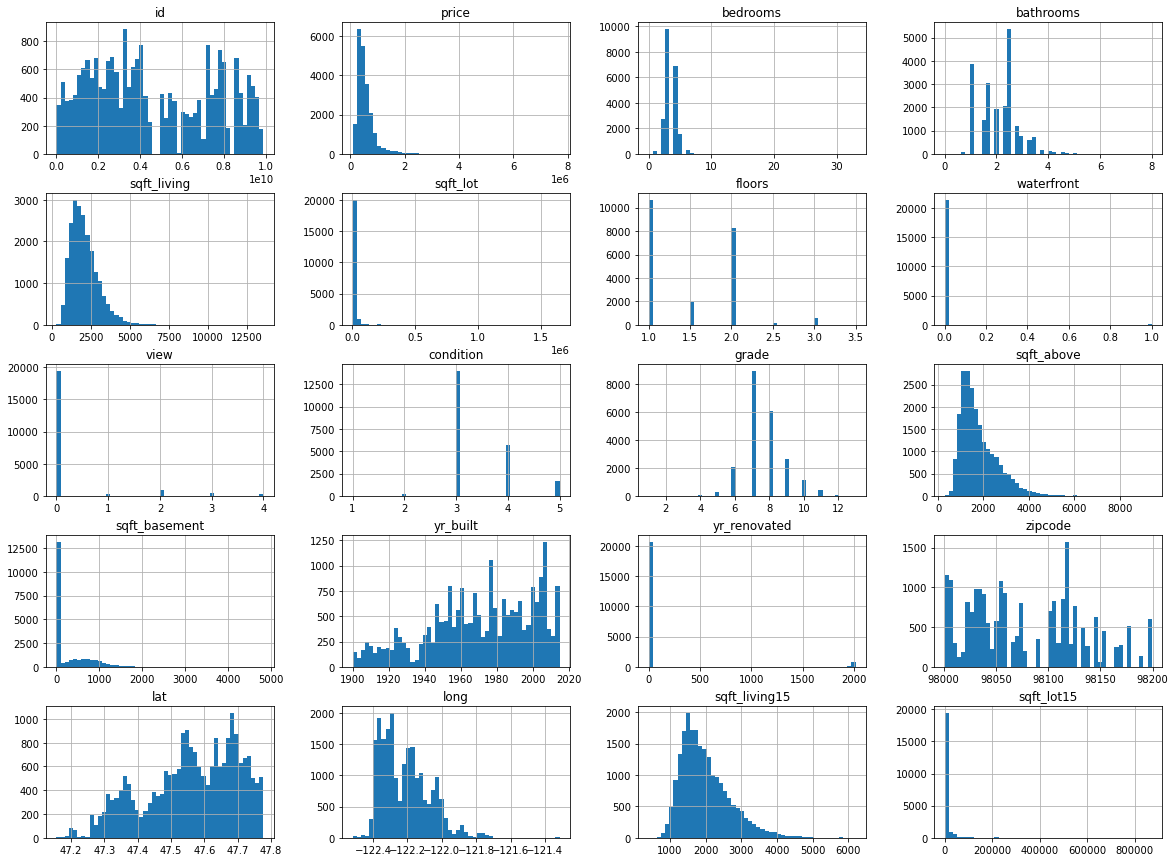

In [25]:
# (a) Load the dataset, display it, visualize various columns and explain the dataset composition

df = pd.read_csv("kc_house_data.csv")
df.hist(bins=50, figsize=(20,15))
plt.show()

In [26]:
# (b) Describe the dataset

r,c = df.shape
print("Total no. of rows: {}".format(r))
print("Total no. of cols: {}\n".format(c))
print(df.describe())

Total no. of rows: 21613
Total no. of cols: 21

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std

In [27]:
# (c) Houses with how many bedrooms are most sold?

max_value = 0
no_bedroom = 0

for k,v in df['bedrooms'].value_counts().items():
    if k > max_value:
        no_bedroom = k
        max_value  = v
print("Houses with {} bedroom are most sold.".format(no_bedroom))

Houses with 3 bedroom are most sold.


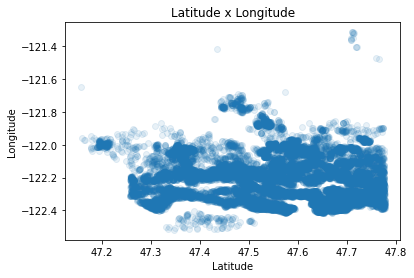

In [30]:
# (d) Visualizing the location of the houses based on latitude and longitude. Use appropriate plot.

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude x Longitude")
plt.scatter(df['lat'].tolist(), df['long'].tolist(), alpha=0.1)
plt.show()

<AxesSubplot:>

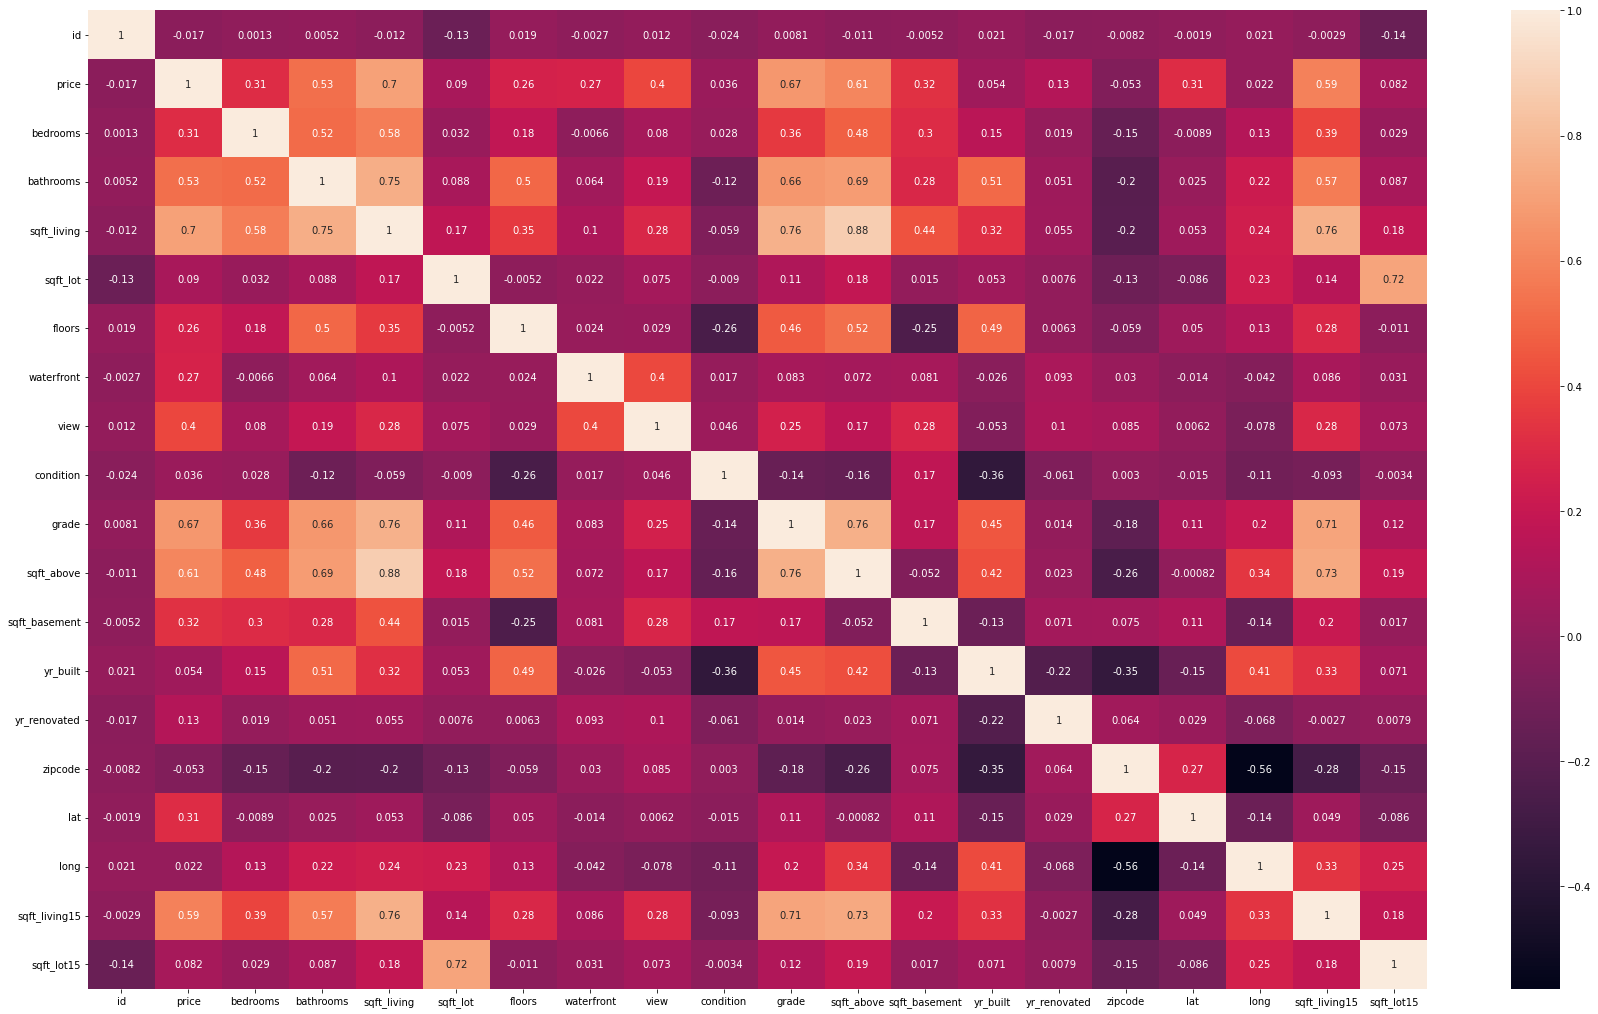

In [31]:
# (e) Find the correlated features/ columns

df = pd.read_csv("kc_house_data.csv")
plt.figure(figsize=(30,18))
c = df.corr()
sns.heatmap(c,annot=True)

In [32]:
# (f) Find null values and fill with mean value for all columns

df = pd.read_csv("kc_house_data.csv")
for i in df.keys():
    df[i].fillna(value=df[i].mean, inplace=True)

In [33]:
# (g) Find dependant and independent data (place in X and y)

x = df[['sqft_lot15','grade','sqft_above','sqft_living']]
y = df['price']

In [34]:
# (h) Split train and test data

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, shuffle=True)

In [35]:
# (i) Train the model and test it. Find the accuracy.

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
rmse = (np.sqrt(mse))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:

MSE is 59107005921.30639
RMSE is 243119.32445058
R2 score is 0.5423699959717868


In [36]:
# (j) Test the model using some arbitrary input.

print(" for (sqft_lot15= 5650, grade=7, sqft_above=1180, sqft_living=1180) price is {}"
      .format(lin_model.predict([[5650,7,1180,1180]])))

 for (sqft_lot15= 5650, grade=7, sqft_above=1180, sqft_living=1180) price is [308456.68499345]


C:\Users\agraw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
